# OH -18: SVM and Decision Trees

In [6]:
import mglearn
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats, display
import warnings
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
warnings.filterwarnings("ignore")

## SVM review

In [ ]:
X,y = mglearn.tools.make_handcrafted_dataset()

In [ ]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

In [ ]:
from sklearn.svm import SVC

svm = SVC(kernel="rbf", C=10, gamma=0.1).fit(X,y)

In [ ]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
mglearn.plots.plot_2d_separator(svm, X, eps=0.5)

In [ ]:
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
sv = svm.support_vectors_
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

In [ ]:
svm = SVC(kernel="rbf", C=1, gamma=1).fit(X,y)
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
sv = svm.support_vectors_
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

## Decision Trees

In [ ]:
mglearn.plots.plot_tree_progressive()

## Controlling the complexity of the DT

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data,
                                                   cancer.target,
                                                   stratify=cancer.target,
                                                   random_state=42)

In [ ]:
tree = DecisionTreeClassifier(random_state=123)

In [ ]:
tree.fit(X_train, y_train)

In [ ]:
tree.score(X_train,y_train)

In [ ]:
tree.score(X_test,y_test)

In [ ]:
tree = DecisionTreeClassifier(max_depth=4, random_state=123)
tree.fit(X_train, y_train)

In [ ]:
tree.score(X_train,y_train)

In [ ]:
tree.score(X_test,y_test)

## Ensemble of Decision Trees

## Random Forest

In [2]:
from sklearn.datasets import make_moons

In [3]:
X,y = make_moons(n_samples=100, noise=0.25, random_state=3)

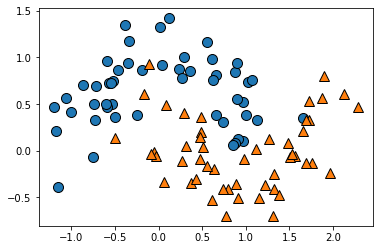

In [4]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   stratify=y,
                                                   random_state=42)

In [8]:
from sklearn.ensemble import RandomForestClassifier

In [9]:
forest = RandomForestClassifier(n_estimators=5, random_state=2)

In [10]:
forest.fit(X_train,y_train)

RandomForestClassifier(n_estimators=5, random_state=2)

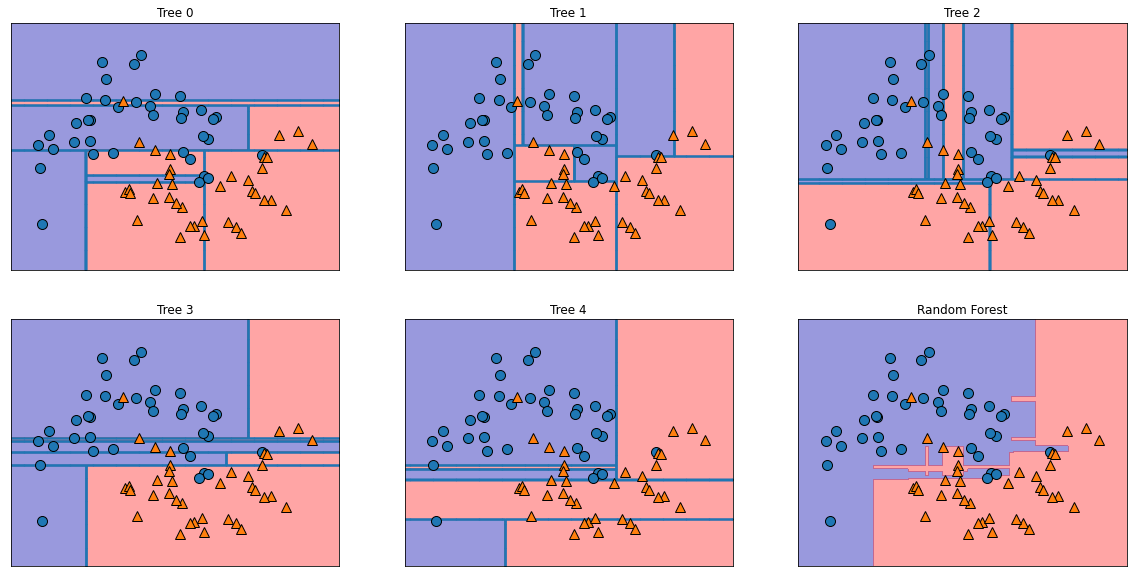

In [11]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, -1],
                                alpha=.4)
axes[-1, -1].set_title("Random Forest")
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)